# Required assignment 9.1 Coding your decision trees

In this notebook, you’ll build a decision tree classifier using a real-world data set in Python. The workflow starts with thorough data preprocessing, followed by model training, evaluation and visualisation. You’ll then impute additional data sets to further test the classifier and analyse the resulting confusion matrix.

In [47]:
### Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree


The [Telco Customer Churn](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset) data set contains information about 7,043 customers of a fictional telecommunications company, including demographics, account details, services subscribed and whether the customer has churned or not. This data set is widely used for building predictive models to identify customers at risk of leaving, enabling organisations to develop effective retention strategies.

In [48]:
df = pd.read_csv('data/Telco_customer_churn.csv')

In [49]:
df.shape

(7043, 33)

In [50]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [51]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Data preprocessing

When building a machine learning model to predict customer churn (or a similar outcome), not all columns in the data set are useful. Some should be excluded because they serve as unique identifiers, are redundant, are overly granular or are directly related to the target variable. For example, columns such as `CustomerID`, `City`, `State`, `Zip Code`, `Lat Long`, `Latitude`, `Longitude`, `Churn Value`, `Churn Score`, and `Churn Reason` can be dropped, as they either provide limited predictive value or leak information about the outcome.

### Question 1

Drop the columns listed in `columns_to_drop` from the data set `df`, and store the resulting data frame in `df_cleaned`.

In [52]:
### GRADED CELL
columns_to_drop = [
    'CustomerID', 'City', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Score', 'Churn Reason'
]
df_cleaned = ...
# Drop the columns and keep a fresh copy
# YOUR CODE HERE
#raise NotImplementedError()
df_cleaned = df.drop(columns=columns_to_drop).copy()

#Display the remaining columns
print("Remaining columns:")
print(df_cleaned.columns)

Remaining columns:
Index(['Count', 'Country', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')


### Question 2

The target is `Churn Value`.
Find the unique values of `Churn Value` and assign it to `ans2`.

In [53]:
### GRADED

ans2 = None

# YOUR CODE HERE
#raise NotImplementedError()

# Find unique values in the target column
ans2 = df_cleaned['Churn Value'].unique()

print("The unique values of `Churn Value` is given by")
print(ans2)


The unique values of `Churn Value` is given by
[1 0]


The first step in data preprocessing is to remove columns that are not relevant for model building. 

Next, you eliminate features that have little correlation with the target variable. To do this, you’ll first explore some of the columns and select the most appropriate ones by choosing a mix of numeric and non-numeric features.

Let’s begin by separating the target variable from the input features.

In [54]:
df_cleaned.columns


Index(['Count', 'Country', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')

### Question 3

From the `df_cleaned` data set, separate the input features and the target variable `Churn Value`:

- Drop the `Churn Value` from the input features in the `df_cleaned`data set and store the features in `X`.

- Store the target `Churn Value` in the output `y`.

In [55]:
### GRADED CELL
X=None
y=None

# YOUR CODE HERE
#raise NotImplementedError()
### Answer Test

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

print(X.shape)
print(y.shape)


(7043, 22)
(7043,)


The features in `selected_features` are chosen for their relevance to churn behaviour. They reflect customer relationship duration, payment and contract flexibility, service usage and demographic risk factors. These factors are commonly linked to churn in both research and industry practice.

The `selected_features` has both numeric and categorical features.

### Question 4

- Separate the numeric and categorical features.

- Encode the categorical features (use `get_dummies` for one-hot encoding).

- Concatenate the numeric and encoded categorical features.

Note: `Tenure Months` and `Total Charges` are the only numeric features.

In [56]:
### GRADED CELL

selected_features = [
    'Tenure Months', 'Total Charges', 'Contract',
    'Payment Method', 'Paperless Billing', 'Internet Service',
   'Tech Support', 'Streaming TV', 'Streaming Movies', 'Senior Citizen', 'Gender'
    ]
numeric_features = ...
categorical_features = ...
df_numeric = ...
df_categorical = ...
X = ...
# YOUR CODE HERE
#raise NotImplementedError()

# Separate numeric and categorical features
numeric_features = ['Tenure Months', 'Total Charges']
categorical_features = [col for col in selected_features if col not in numeric_features]

# Extract numeric features
df_numeric = df[numeric_features]

# One-hot encode categorical features
df_categorical = pd.get_dummies(df[categorical_features], drop_first=True)

# Combine numeric and encoded categorical features
X = pd.concat([df_numeric, df_categorical], axis=1)


# Answer Test
print(X.shape)


(7043, 18)


In [57]:
X.replace(r'^\s*$', np.nan, regex=True, inplace=True)
X = X.infer_objects()
X.fillna(0, inplace=True)
X = X.apply(pd.to_numeric)

### Question 5

- Use `train_test_split` from `sklearn.model_selection` and split the data into`X_train`,`X_test`,`y_train`,`y_test`. Use 20 per cent as the `test_size`.

- Model a `DecisionTreeClassifier` and store the model in `clf`.

- Fit the model and compute `y_pred` using the `.predict()` function.

In [58]:
### GRADED CELL
X_train, X_test, y_train, y_test = None, None, None, None
clf = None
y_pred = None

# YOUR CODE HERE
#raise NotImplementedError()

# 1) Train / test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2) Define the model
clf = DecisionTreeClassifier(random_state=42)

# 3) Fit and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Answer test
print(y_pred)



[1 0 0 ... 1 0 1]


### Question 6

- Compute the `confusion_matrix` using the `y_test` and `y_pred` functions.

- Compute the accuracy.

In [59]:
### GRADED CELL
cm = None
accuracy = None

# YOUR CODE HERE
#raise NotImplementedError()

from sklearn.metrics import confusion_matrix, accuracy_score

# 1) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Answer test
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")



Confusion Matrix:
 [[815 194]
 [200 200]]
Accuracy: 0.72


In [60]:
from sklearn.tree import DecisionTreeClassifier

# Pre-pruned decision tree (limits depth and leaf size)
clf_pruned = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,           # Limit tree depth
    min_samples_leaf=5,    # Minimum samples per leaf
    max_leaf_nodes=10,     # Maximum number of leaf nodes
    random_state=42
)
clf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       random_state=42)

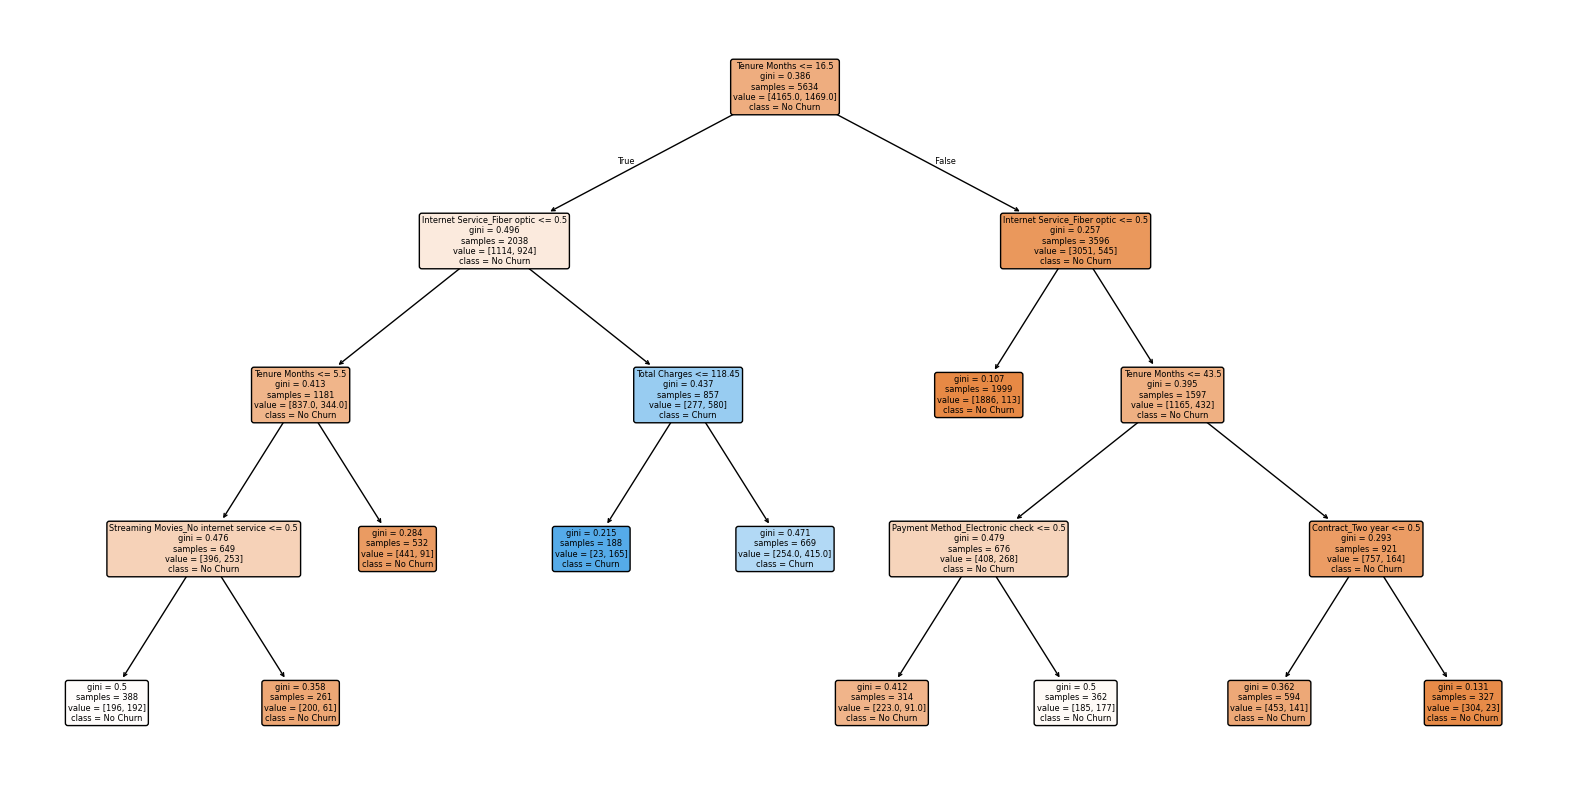

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(
    clf_pruned,
    feature_names=X_train.columns,         # Use your feature names
    class_names=['No Churn', 'Churn'],     # Adjust if your target classes are different
    filled=True,
    rounded=True
)
plt.show()


By applying pre-pruning techniques and visualising the resulting tree, this approach strikes a balance between interpretability and performance, keeping the decision tree both understandable and less prone to overfitting.